#  Project 4: Product Mix Optimization Using Linear Programming

##  Objective:
To determine the optimal number of units of four products (A, B, C, and D) that a company should produce in order to **maximize profit**, while staying within the limits of available **labor hours** and **raw materials**.

##  Business Context:
A manufacturing company produces four types of products. Each product:
- Requires a specific amount of labor hours and raw materials to produce.
- Provides a certain amount of profit per unit.

The company has a limited number of labor hours and raw material stock. The goal is to find the most profitable combination of products to manufacture without exceeding resource limits.

##  Methodology:
We formulate this as a **Linear Programming (LP)** problem and solve it using the `PuLP` library in Python. The model includes:
- **Decision variables**: units of each product to produce
- **Objective function**: maximize total profit
- **Constraints**: limits on labor and material usage

---



## Problem Data

We are optimizing a product mix involving four products: **A**, **B**, **C**, and **D**.  
Each product provides a specific **profit per unit**, and consumes a certain amount of **labor hours** and **raw material** per unit.

### Profit per unit (in ₹):
- Product A: ₹20  
- Product B: ₹30  
- Product C: ₹25  
- Product D: ₹15  

### Labor hours required per unit:
- Product A: 2 hours  
- Product B: 1 hour  
- Product C: 3 hours  
- Product D: 2 hours  

### Material required per unit (in kg):
- Product A: 3 kg  
- Product B: 4 kg  
- Product C: 2 kg  
- Product D: 1 kg  

### Available Resources:
- Total labor hours available: **150**
- Total material available: **140 kg**


In [2]:
# Import PuLP library for Linear Programming
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus, value

# For displaying results in tabular form
import pandas as pd


In [3]:
# List of products
products = ['A', 'B', 'C', 'D']

# Profit per unit of each product
profit = {
    'A': 20,
    'B': 30,
    'C': 25,
    'D': 15
}

# Labor hours required per unit
labor_hours = {
    'A': 2,
    'B': 1,
    'C': 3,
    'D': 2
}

# Material required per unit (kg)
material_required = {
    'A': 3,
    'B': 4,
    'C': 2,
    'D': 1
}

# Available resources
total_labor = 150      # total labor hours available
total_material = 140   # total material in kg available


In [4]:
# Define the Linear Programming problem
model = LpProblem("Product_Mix_Optimization", LpMaximize)

# Define decision variables for each product (number of units to produce)
# Variables are continuous and >= 0 (can be changed to integer later if needed)
production_units = {p: LpVariable(name=f"Units_{p}", lowBound=0) for p in products}


In [5]:
# Set the objective: Maximize total profit
model += lpSum(profit[p] * production_units[p] for p in products), "Total_Profit"


In [6]:
# Labor constraint: Total labor used ≤ available labor hours
model += lpSum(labor_hours[p] * production_units[p] for p in products) <= total_labor, "Labor_Constraint"

# Material constraint: Total material used ≤ available material
model += lpSum(material_required[p] * production_units[p] for p in products) <= total_material, "Material_Constraint"


In [7]:
# Solve the optimization problem
model.solve()

# Print the status of the solution
print("Status:", LpStatus[model.status])

# Print the optimal number of units to produce for each product
print("\nOptimal Production Plan:")
for p in products:
    print(f"Produce {production_units[p].varValue:.2f} units of Product {p}")

# Print the maximum profit achieved
print(f"\nMaximum Profit: ₹{value(model.objective):.2f}")


Status: Optimal

Optimal Production Plan:
Produce 0.00 units of Product A
Produce 18.57 units of Product B
Produce 0.00 units of Product C
Produce 65.71 units of Product D

Maximum Profit: ₹1542.86


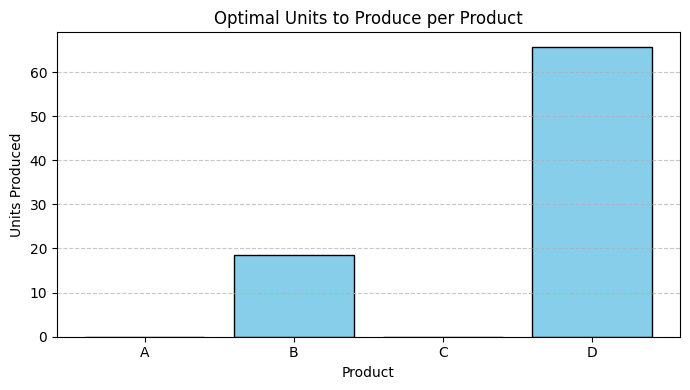

In [9]:
# Optional: Visualize the number of units to produce
import matplotlib.pyplot as plt

# Get values from the optimized solution
units = [production_units[p].varValue for p in products]

# Create a bar plot
plt.figure(figsize=(7, 4))
plt.bar(products, units, color='skyblue', edgecolor='black')
plt.title("Optimal Units to Produce per Product")
plt.xlabel("Product")
plt.ylabel("Units Produced")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
# ---------- WHAT-IF: Increase labor from 150 to 200 ----------

# New labor availability
new_total_labor = 200

# Re-define the model
what_if_model = LpProblem("What_If_Increased_Labor", LpMaximize)

# Decision variables
what_if_units = {p: LpVariable(name=f"WhatIf_Units_{p}", lowBound=0) for p in products}

# Objective function
what_if_model += lpSum(profit[p] * what_if_units[p] for p in products), "Total_Profit"

# Constraints with new labor
what_if_model += lpSum(labor_hours[p] * what_if_units[p] for p in products) <= new_total_labor, "Labor_Constraint"
what_if_model += lpSum(material_required[p] * what_if_units[p] for p in products) <= total_material, "Material_Constraint"

# Solve
what_if_model.solve()

# Print new results
print("Status (What-if):", LpStatus[what_if_model.status])

print("\nOptimal Production Plan (with 200 Labor Hours):")
for p in products:
    print(f"Produce {what_if_units[p].varValue:.2f} units of Product {p}")

print(f"\nNew Maximum Profit: ₹{value(what_if_model.objective):.2f}")


Status (What-if): Optimal

Optimal Production Plan (with 200 Labor Hours):
Produce 0.00 units of Product A
Produce 11.43 units of Product B
Produce 0.00 units of Product C
Produce 94.29 units of Product D

New Maximum Profit: ₹1757.14


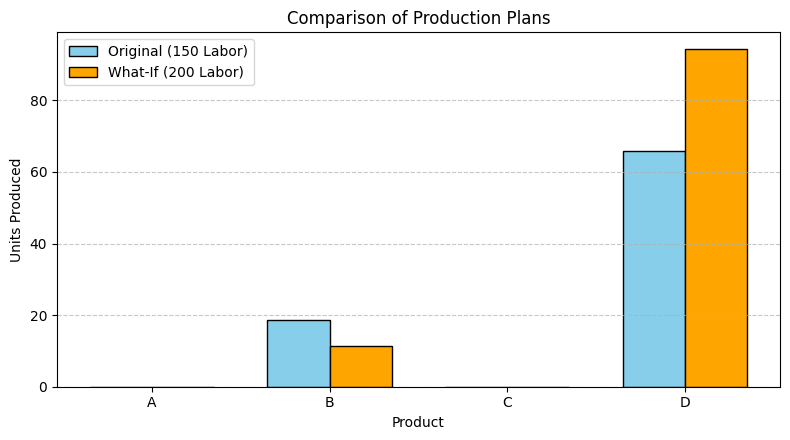

In [11]:
import numpy as np

# Get production values from both models
original_units = [production_units[p].varValue for p in products]
whatif_units = [what_if_units[p].varValue for p in products]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(products))  # positions for products

# Create the plot
plt.figure(figsize=(8, 4.5))
plt.bar(x, original_units, width=bar_width, label='Original (150 Labor)', color='skyblue', edgecolor='black')
plt.bar(x + bar_width, whatif_units, width=bar_width, label='What-If (200 Labor)', color='orange', edgecolor='black')

# Labels and titles
plt.xlabel("Product")
plt.ylabel("Units Produced")
plt.title("Comparison of Production Plans")
plt.xticks(x + bar_width / 2, products)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# ---------- NEW MODEL: Minimum 5 Units of Each Product ----------

# Re-define model with new constraint
min5_model = LpProblem("Min_5_Units_Model", LpMaximize)

# Decision variables with minimum 5 units
min5_units = {
    p: LpVariable(name=f"Min5_Units_{p}", lowBound=5) for p in products
}

# Objective function (same)
min5_model += lpSum(profit[p] * min5_units[p] for p in products), "Total_Profit"

# Constraints (same resource limits)
min5_model += lpSum(labor_hours[p] * min5_units[p] for p in products) <= total_labor, "Labor_Constraint"
min5_model += lpSum(material_required[p] * min5_units[p] for p in products) <= total_material, "Material_Constraint"

# Solve
min5_model.solve()

# Print results
print("Status (Min 5 Units):", LpStatus[min5_model.status])

print("\nProduction Plan (Minimum 5 Units Each):")
for p in products:
    print(f"Produce {min5_units[p].varValue:.2f} units of Product {p}")

print(f"\nMaximum Profit with Minimum Production Constraint: ₹{value(min5_model.objective):.2f}")


Status (Min 5 Units): Optimal

Production Plan (Minimum 5 Units Each):
Produce 5.00 units of Product A
Produce 15.00 units of Product B
Produce 5.00 units of Product C
Produce 55.00 units of Product D

Maximum Profit with Minimum Production Constraint: ₹1500.00


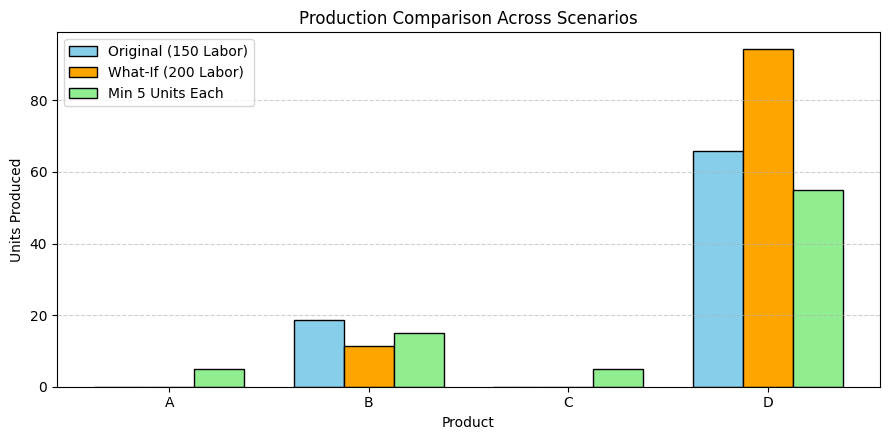

In [13]:
# Get units from all 3 models
original_units = [production_units[p].varValue for p in products]
whatif_units = [what_if_units[p].varValue for p in products]
min5_units_list = [min5_units[p].varValue for p in products]

# Bar positions
bar_width = 0.25
x = np.arange(len(products))

# Plot all 3 scenarios
plt.figure(figsize=(9, 4.5))
plt.bar(x, original_units, width=bar_width, label='Original (150 Labor)', color='skyblue', edgecolor='black')
plt.bar(x + bar_width, whatif_units, width=bar_width, label='What-If (200 Labor)', color='orange', edgecolor='black')
plt.bar(x + 2*bar_width, min5_units_list, width=bar_width, label='Min 5 Units Each', color='lightgreen', edgecolor='black')

# Labels and formatting
plt.xlabel("Product")
plt.ylabel("Units Produced")
plt.title("Production Comparison Across Scenarios")
plt.xticks(x + bar_width, products)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


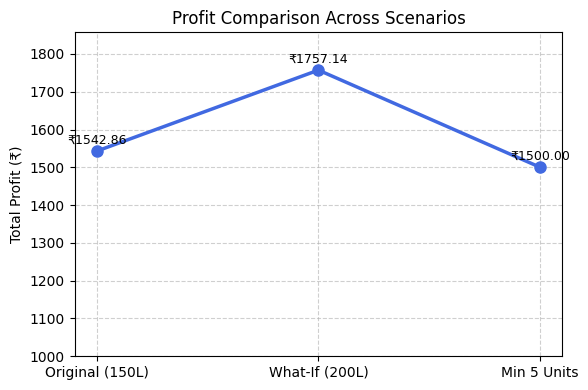

In [16]:
# Total profits from each model
original_profit = value(model.objective)
whatif_profit = value(what_if_model.objective)
min5_profit = value(min5_model.objective)

# Labels and values
scenarios = ['Original (150L)', 'What-If (200L)', 'Min 5 Units']
profits = [original_profit, whatif_profit, min5_profit]

# Line plot for profit comparison (with y-axis starting from 1000 and new color)
plt.figure(figsize=(6, 4))

# Plot with a new, more vivid line color
plt.plot(scenarios, profits, marker='o', linestyle='-', color='#4169E1', linewidth=2.5, markersize=8)

# Add title and labels
plt.title("Profit Comparison Across Scenarios")
plt.ylabel("Total Profit (₹)")
plt.ylim(1000, max(profits) + 100)  # Compress Y-axis starting from 1000

# Annotate each point with profit value
for i, val in enumerate(profits):
    plt.text(i, val + 20, f"₹{val:.2f}", ha='center', fontsize=9)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



---

# Business Insights and Final Conclusion

## Interpretation of Base Results:
- The optimization model provided the most profitable mix of products (A, B, C, D) within the given labor and material limits.
- Some products (like A and C) were excluded in the base solution, as they were not optimal given the constraints.
- This demonstrates how linear programming naturally prioritizes resource-efficient and profitable products.

## Extended Analysis Summary:

### 1. What-If Analysis – Increased Labor Availability
- Labor hours were increased from **150 to 200** to simulate improved workforce availability.
- Result: Total profit increased significantly.
- Insight: The production plan shifted to take advantage of extra labor, showing how sensitive the model is to constraint changes. However, material became a new bottleneck.

### 2. Business Rule Enforcement – Minimum 5 Units per Product
- A constraint was added requiring **at least 5 units** of every product, regardless of profitability.
- Result: Total profit decreased slightly, but all products were included in the production plan.
- Insight: This represents real business trade-offs — sometimes brand presence or contractual obligations matter more than pure profit.

## Visual Comparison Summary:
- Bar charts and line plots were used to compare all three scenarios side-by-side.
- These visualizations made it easy to:
  - Understand how each constraint affected output.
  - Compare profit and production plans across cases.

## Final Conclusion:

This project demonstrated how **Linear Programming** using Python’s `PuLP` library can:
- Efficiently solve real-world business optimization problems.
- Provide clear, actionable insights for decision-makers.
- Adapt to changing scenarios like resource increases or business constraints.

With a modular structure and dynamic inputs, this approach can be extended to more products, resources, or constraints — making it a powerful tool in a data-driven business environment.

